<a href="https://colab.research.google.com/github/ririsueve/PYTHON_KHDL_K23/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = "/content/data.csv"

### **Data description / Definition**

1. ID: Một mã định danh duy nhất cho mỗi bản ghi (cá nhân).

2. AGE: Độ tuổi của cá nhân (ví dụ: 26-39, 40-64,...).

3. GENDER: Giới tính của cá nhân (ví dụ: 'Nam', 'Nữ', 'Khác').

4. DRIVING_EXPERIENCE: Kinh nghiệm lái xe (tính bằng năm hoặc theo nhóm như '0-9 năm', '10-19 năm',...).

5. EDUCATION: Trình độ học vấn của cá nhân (ví dụ: 'Trung học', 'Đại học',...).

6. INCOME: Mức thu nhập, có thể là số hoặc được phân loại:
  * Poverty: Cá nhân hoặc gia đình sống dưới mức sống tối thiểu; thu nhập rất thấp hoặc không có.
  * Working Class: Những người có thu nhập thấp đến trung bình, thường làm các công việc lao động chân tay hoặc dịch vụ.
  * Middle Class: Những người có thu nhập ổn định, thường là các chuyên gia được hưởng lương, đủ khả năng chi trả các nhu cầu cơ bản và có một khoản tiết kiệm.
  * Upper Class: Những cá nhân giàu có, thường sở hữu các tài sản hoặc doanh nghiệp đáng kể.

7. CREDIT_SCORE: Điểm tín dụng tài chính – một chỉ số về độ tin cậy tín dụng.

8. VEHICLE_OWNERSHIP: Cá nhân có sở hữu phương tiện hay không (1 = Có, 0 = Không).

9. VEHICLE_YEAR: Năm chiếc xe được sản xuất, hoặc được nhóm lại (ví dụ: 'Trước 2015', 'Sau 2015').

10. MARRIED: Tình trạng hôn nhân (1 = Đã kết hôn, 0 = Chưa kết hôn).

11. CHILDREN: Tình trạng con cái (1 = Có, 0 = Không).

12. POSTAL_CODE: Mã bưu chính nơi cư trú của cá nhân – có thể giúp suy ra khu vực.

13. ANNUAL_MILEAGE: Số dặm/kilômét lái xe mỗi năm.

14. SPEEDING_VIOLATIONS: Số lần vi phạm tốc độ đã được ghi nhận.

15. DUIS: Số lần bị tai nạn do Lái xe khi bị Ảnh hưởng (DUI - Driving Under Influence) đã xảy ra.

16. PAST_ACCIDENTS: Số vụ tai nạn giao thông trong quá khứ.

17. TYPE_OF_VEHICLE: Loại phương tiện (ví dụ: 'Sedan', 'SUV', 'Truck', 'Van').

18. OUTCOME: Biến mục tiêu cho việc phân loại. Nó có thể đại diện cho việc:
  * cá nhân đó được chấp nhận bảo hiểm,
  * bị coi là rủi ro cao, v.v.


In [4]:
df = pd.read_csv(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105017 entries, 0 to 105016
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   105017 non-null  int64  
 1   AGE                  105017 non-null  object 
 2   GENDER               105016 non-null  object 
 3   DRIVING_EXPERIENCE   105016 non-null  object 
 4   EDUCATION            104991 non-null  object 
 5   INCOME               105017 non-null  object 
 6   CREDIT_SCORE         105016 non-null  float64
 7   VEHICLE_OWNERSHIP    105016 non-null  float64
 8   VEHICLE_YEAR         105016 non-null  object 
 9   MARRIED              105016 non-null  float64
 10  CHILDREN             105000 non-null  float64
 11  POSTAL_CODE          105016 non-null  float64
 12  ANNUAL_MILEAGE       105017 non-null  int64  
 13  SPEEDING_VIOLATIONS  104973 non-null  float64
 14  DUIS                 104992 non-null  float64
 15  PAST_ACCIDENTS   

## **1. MISSING DATA**

In [5]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

print("Missing values ở các cột lần lượt là:")
print(missing_values.sort_values(ascending=False))

Missing values ở các cột lần lượt là:
SPEEDING_VIOLATIONS    44
EDUCATION              26
DUIS                   25
CHILDREN               17
CREDIT_SCORE            1
DRIVING_EXPERIENCE      1
GENDER                  1
VEHICLE_OWNERSHIP       1
MARRIED                 1
VEHICLE_YEAR            1
POSTAL_CODE             1
PAST_ACCIDENTS          1
dtype: int64


## **2. CHIA DATA THÀNH 2 LOẠI: NUMERICAL VÀ CATEGORICAL ĐỂ KHÁM PHÁ**

In [6]:

categorical_data=df.select_dtypes(include= 'object')
categorical_features=categorical_data.columns.tolist()

print(f'Có {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

Có 7 categorical features: 

['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR', 'TYPE_OF_VEHICLE']


In [7]:
numerical_data = df.select_dtypes(include='number')
numerical_features=numerical_data.columns.tolist()

print(f'Có {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

Có 11 numerical features: 

['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME']


## 2.1. Numerical Features

In [8]:
# Thông kế phân phối, trung bình, trung vị, độ lệch chuẩn, giá trị lớn nhất, bé nhất
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,105017.0,394919.044250,279693.639800,101.00000,156329.000000,354655.000000,598594.000000,999976.000000
CREDIT_SCORE,105016.0,0.602161,0.138046,0.06688,0.514855,0.601108,0.703213,0.954075
VEHICLE_OWNERSHIP,105016.0,0.827064,0.378193,0.00000,1.000000,1.000000,1.000000,1.000000
MARRIED,105016.0,0.584159,0.492869,0.00000,0.000000,1.000000,1.000000,1.000000
CHILDREN,105000.0,0.520076,0.499599,0.00000,0.000000,1.000000,1.000000,1.000000
POSTAL_CODE,105016.0,18045.234440,16708.232327,10238.00000,10238.000000,10238.000000,22957.750000,92101.000000
ANNUAL_MILEAGE,105017.0,11060.361656,2975.091433,-14000.00000,9000.000000,11000.000000,13000.000000,21000.000000
SPEEDING_VIOLATIONS,104973.0,0.675888,1.383816,0.00000,0.000000,0.000000,1.000000,20.000000
DUIS,104992.0,0.129772,0.589802,0.00000,0.000000,0.000000,0.000000,6.000000
PAST_ACCIDENTS,105016.0,0.549107,1.402784,-5.00000,0.000000,0.000000,0.000000,15.000000


In [9]:
#thống kê các giá trị âm ở mỗi cột
numerical_data[numerical_data < 0].count()

,0
ID,0
CREDIT_SCORE,0
VEHICLE_OWNERSHIP,0
MARRIED,0
CHILDREN,0
POSTAL_CODE,0
ANNUAL_MILEAGE,3
SPEEDING_VIOLATIONS,0
DUIS,0
PAST_ACCIDENTS,3


# **Nhận xét:**
Dựa vào phân tích bảng thống kê mô tả cơ bản, một vấn đề đáng lưu ý về tính toàn vẹn dữ liệu đã được phát hiện ở hai đặc trưng số: ANNUAL_MILEAGE (Số dặm đi hàng năm) và PAST_ACCIDENTS (Số vụ tai nạn trong quá khứ). Cụ thể, giá trị nhỏ nhất (min) được ghi nhận của hai cột này lần lượt là -140.000 và -5. Về mặt ngữ nghĩa, đây là các giá trị âm không hợp lệ, vì số dặm bay tích lũy và số vụ tai nạn không thể nhận giá trị nhỏ hơn không.


Các số liệu thống kê đã xác nhận rằng hiện tượng giá trị âm bất hợp lý chỉ tập trung tại hai cột ANNUAL_MILEAGE và PAST_ACCIDENTS. Phát hiện này là cơ sở quan trọng cho việc xác định các bước làm sạch và chuẩn hóa dữ liệu cần thiết trong giai đoạn tiền xử lý tiếp theo.

In [10]:
# Phương sai
numerical_data.var()

,0
ID,7.822853e+10
CREDIT_SCORE,1.905677e-02
VEHICLE_OWNERSHIP,1.430302e-01
MARRIED,2.429196e-01
CHILDREN,2.495993e-01
POSTAL_CODE,2.791650e+08
ANNUAL_MILEAGE,8.851169e+06
SPEEDING_VIOLATIONS,1.914946e+00
DUIS,3.478666e-01
PAST_ACCIDENTS,1.967802e+00


In [11]:
#Skew
numerical_data.skew()

,0
ID,0.448446
CREDIT_SCORE,-0.226257
VEHICLE_OWNERSHIP,-1.729648
MARRIED,-0.341512
CHILDREN,-0.080371
POSTAL_CODE,2.986917
ANNUAL_MILEAGE,-0.522199
SPEEDING_VIOLATIONS,3.899239
DUIS,5.607515
PAST_ACCIDENTS,4.344563


## **Một số điều đáng chú ý**:

## *a. Các cột có độ lệch dương cao*
Các cột như: **SPEEDING_VIOLATIONS,DUIS và PAST_ACCIDENTS**

  * Ý nghĩa: Độ lệch dương rất mạnh là điều rất hợp lý trong dữ liệu rủi ro. Nó cho thấy phần lớn người lái xe trong tập dữ liệu của bạn có 0 hoặc rất ít vi phạm/tai nạn.
  
  * Các giá trị cực lớn (đuôi phải) đại diện cho một tập hợp nhỏ các cá nhân có rủi ro cao (High-Risk Outliers), những người có số lượng vi phạm/tai nạn cao bất thường.
  
  * Tác động Mô hình: Sự lệch này có thể làm mô hình hóa khó khăn vì mô hình sẽ chủ yếu được huấn luyện trên các trường hợp 0.
  
  --> Đây là một sự kiện hiếm

**POSTAL_CODE**:

Ý nghĩa: Mặc dù mã bưu chính là biến danh nghĩa/định danh (nominal) và Skewness không có ý nghĩa thống kê sâu sắc như với biến số thực, độ lệch dương mạnh cho thấy dữ liệu được thu thập tập trung cao độ ở một hoặc một vài mã bưu chính (khu vực) nhất định.

Tác động Mô hình: Cho thấy có thể có thiên kiến về vị trí (geographic bias) trong mẫu dữ liệu của bạn.

*b. Các cột có độ lệch âm*

**ANNUAL_MILEAGE**:

  * Ý nghĩa: Độ lệch âm mạnh chỉ ra rằng phần lớn người lái xe trong tập dữ liệu đi quãng đường hàng năm lớn (Mileages cao).

  * Cái đuôi bên trái đại diện cho một nhóm nhỏ người lái xe đi quãng đường rất ít.

  * Lưu ý quan trọng: Độ lệch âm này cũng bị ảnh hưởng bởi giá trị bất thường (outlier) rất nhỏ.

  * Tác động Mô hình: Trước khi mô hình hóa,cần xử lý giá trị âm và sau đó cân nhắc biến đổi để làm cho phân phối đối xứng hơn, vì một mô hình hồi quy có thể gặp khó khăn khi dự đoán chính xác các giá trị nằm ở đuôi thấp.

**CREDIT_SCORE**:

  * Ý nghĩa: Phân phối này xấp xỉ đối xứng và rất gần với phân phối chuẩn (Normal Distribution).

  * Điều này cho thấy tập dữ liệu bao gồm một phạm vi tín dụng cân bằng, không bị lệch quá nhiều về phía điểm tốt hay điểm kém. Đây là một phân phối lý tưởng cho các mô hình tuyến tính, và cột này có thể được sử dụng trực tiếp mà không cần biến đổi.


# **Trực quan phân phối của numerical features**

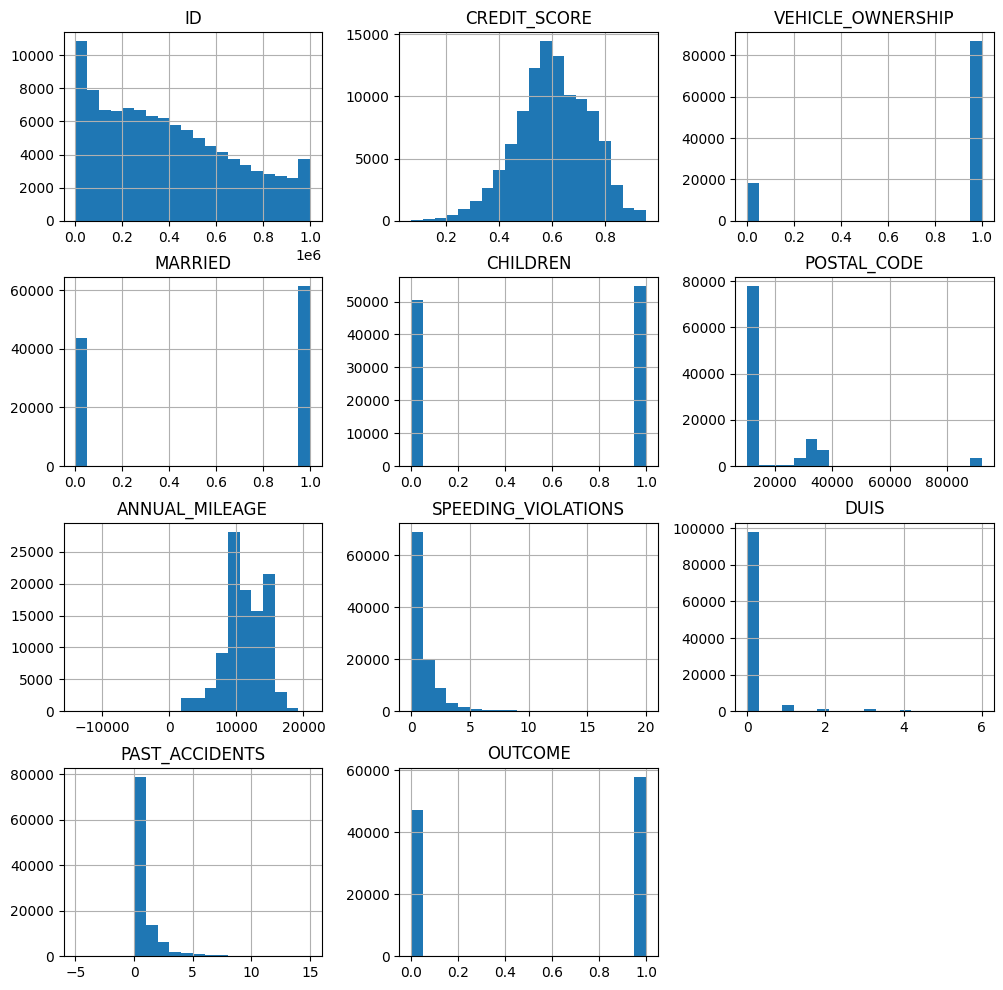

In [12]:
numerical_data.hist(figsize=(12,12),bins=20)
plt.show()

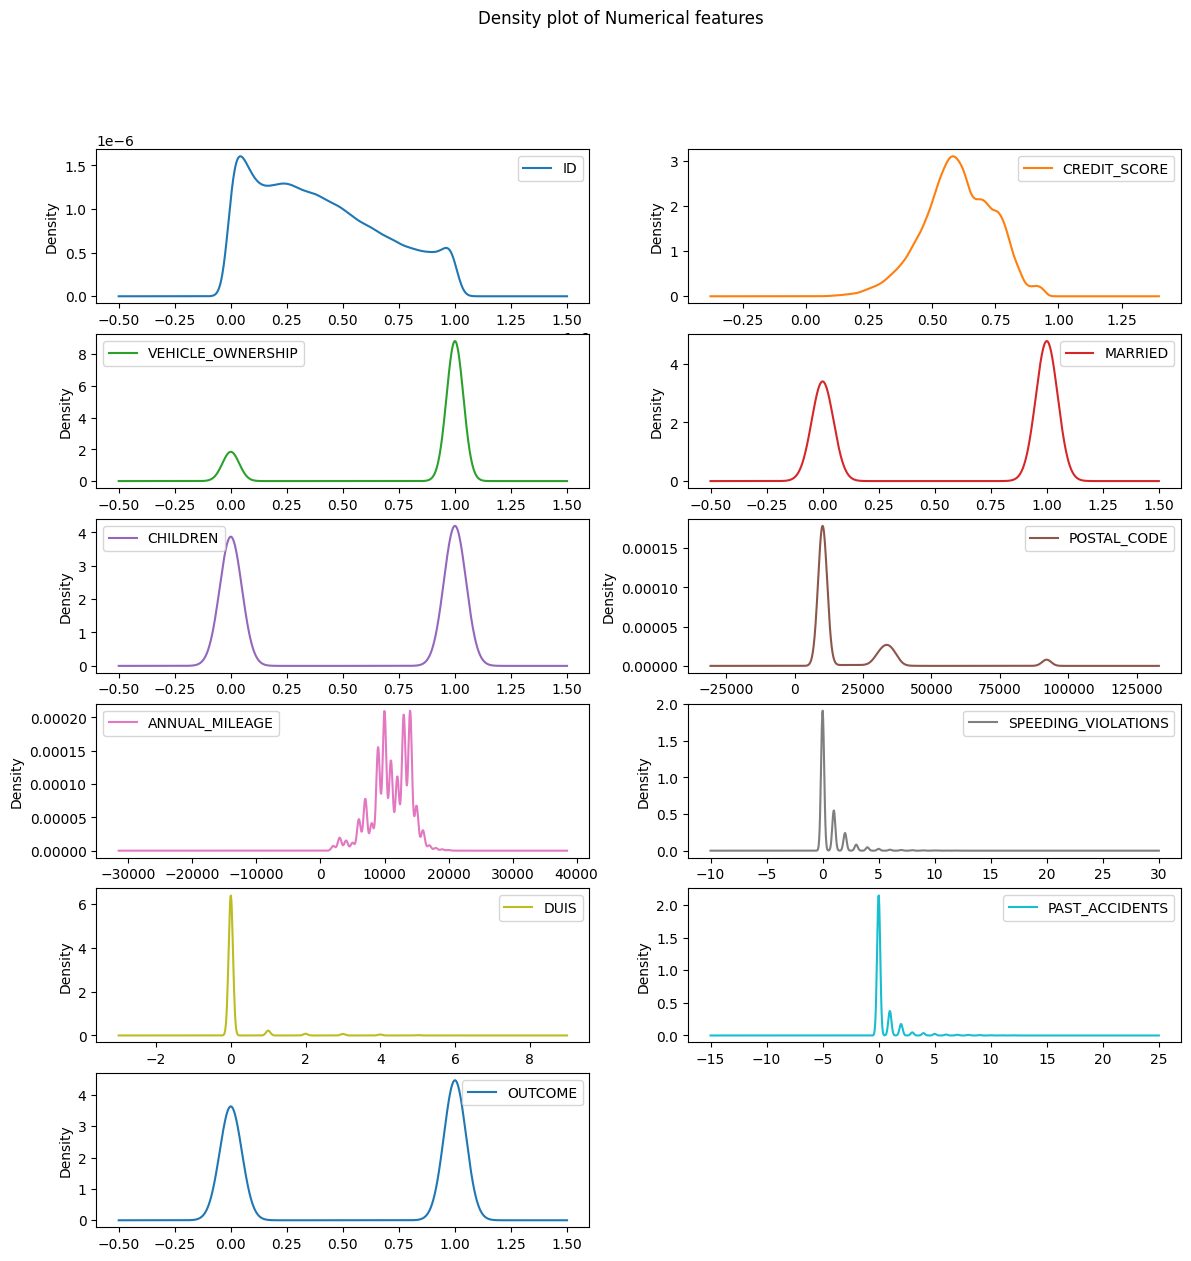

In [13]:
numerical_data.plot(kind='density',figsize=(14,14),subplots=True,layout=(6,2),title="Density plot of Numerical features",sharex=False)
plt.show()

**Đánh giá hình dạng phân phối**

•	Phân phối xấp xỉ chuẩn (Gaussian-like Distribution): Chỉ có hai đặc trưng là CREDIT_SCORE và ANNUAL_MILEAGE thể hiện hình dạng phân phối tương đối giống phân phối Gaussian (hình chuông). Điều này nhất quán với phân tích độ lệch trước đó, cho thấy chúng có tính đối xứng cao hơn so với các biến khác.

•	Các phân phối khác: Các đặc trưng định lượng còn lại không thể hiện bất kỳ hình dạng phân phối chuẩn rõ rệt nào. Điều này xác nhận lại kết quả phân tích Skewness:  các biến đếm (count data) như SPEEDING_VIOLATIONS, DUIS, PAST_ACCIDENTS có độ lệch dương cực mạnh do chứa một lượng lớn giá trị 0, trong khi các biến bản chất là phân loại thì không thể tuân theo phân phối Gaussian.

In [14]:
# Các giá trị duy nhất
numerical_data.nunique()

,0
ID,98486
CREDIT_SCORE,104964
VEHICLE_OWNERSHIP,2
MARRIED,2
CHILDREN,2
POSTAL_CODE,10937
ANNUAL_MILEAGE,23
SPEEDING_VIOLATIONS,21
DUIS,7
PAST_ACCIDENTS,19


**Remarks:**

1. **Các cột ID và CREDIT_SCORE chứa hầu hết các giá trị duy nhất (unique), nhưng các đặc trưng còn lại thể hiện ít biến thiên (less variations) hơn.**

**--> Ý nghĩa:**

ID: Việc ID có các giá trị duy nhất là điều hiển nhiên vì nó là khóa chính (Primary Key) dùng để xác định từng bản ghi.

CREDIT_SCORE: Việc CREDIT_SCORE có hầu hết các giá trị duy nhất là tốt. Điều này chứng tỏ nó là một biến liên tục (Continuous Variable) với độ phân giải cao, giúp mô hình phân biệt tốt hơn giữa các mức độ rủi ro tín dụng khác nhau.

Các đặc trưng còn lại (ít biến thiên): Điều này chỉ ra rằng các biến còn lại (như DRIVING_EXPERIENCE, AGE, INCOME) có thể là biến rời rạc (Discrete) hoặc biến phân loại (Categorical) với số lượng giá trị độc nhất (unique values) ít hơn.


2. **Các biến VEHICLE_OWNERSHIP, CHILDREN, MARRIED là các biến nhị phân (Binary Variables), và OUTCOME (Kết quả - Biến mục tiêu) của chúng ta cũng là một biến nhị phân.**

--> Biến mục tiêu là nhị phân xác nhận rằng đây là bài toán phân loại nhị phân Binary classification

3. **Chỉ có CREDIT_SCORE và ANNUAL_MILEAGE thể hiện phân phối giống Gaussian (Gaussian-like distribution) (tức là phân phối xấp xỉ phân phối chuẩn), các đặc trưng khác không thể hiện bất kỳ phân phối nào rõ rệt.**

**--> Ý nghĩa:**

CREDIT_SCORE và ANNUAL_MILEAGE: "Phân phối giống Gaussian" nghĩa là chúng tương đối đối xứng (như đã thấy trong phân tích Skewness trước: CREDIT_SCORE). Mặc dù ANNUAL_MILEAGE có độ lệch âm mạnh hơn, nó vẫn có hình dạng chuông hơn so với các biến đếm.

Các đặc trưng khác ("doesn't show any distributions"): Điều này xác nhận những gì chúng ta đã thấy trong phân tích Skewness. Các biến SPEEDING_VIOLATIONS, DUIS, PAST_ACCIDENTS là các biến đếm (Count Data) với độ lệch dương cực mạnh (rất nhiều giá trị 0), nên chúng không có hình dạng phân phối chuẩn rõ ràng. Các biến phân loại khác cũng không thể có phân phối Gaussian.

**Gía trị ngoại lai**

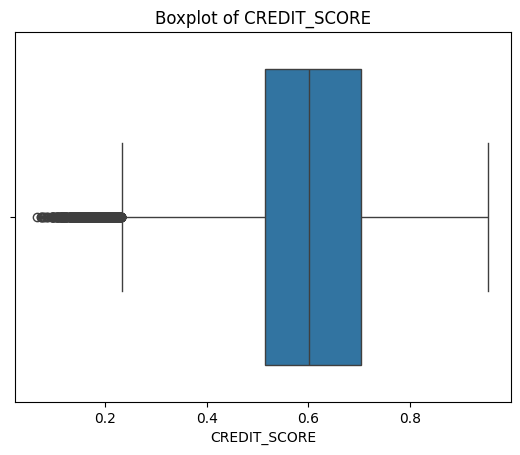

In [15]:
# CREDIT SCORE
sns.boxplot(x=numerical_data['CREDIT_SCORE'])
plt.title('Boxplot of CREDIT_SCORE')
plt.xlabel('CREDIT_SCORE')
plt.show()

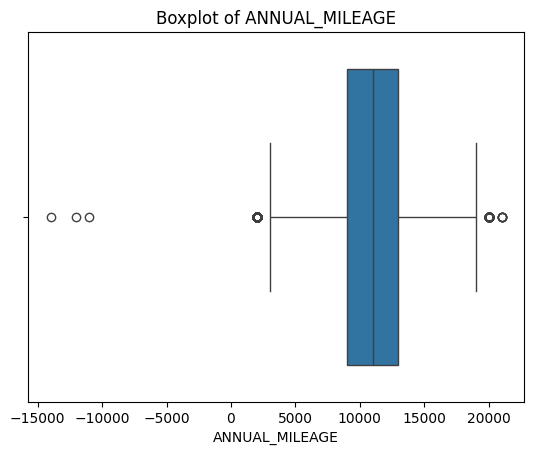

In [16]:
sns.boxplot(x=numerical_data['ANNUAL_MILEAGE'])
plt.title('Boxplot of ANNUAL_MILEAGE')
plt.xlabel('ANNUAL_MILEAGE')
plt.show()

**Nhận xét**

•	Đối với biến CREDIT_SCORE: Biểu đồ hộp cho thấy phần lớn dữ liệu tập trung quanh giá trị trung vị (khoảng 0.6). Tuy nhiên, đáng chú ý là sự xuất hiện của một dải điểm dày đặc nằm ngoài "râu" dưới (lower whisker), kéo dài từ khoảng giá trị 0.05 đến 0.2. Điều này chỉ ra sự tồn tại của một phân khúc khách hàng đáng kể có điểm tín dụng rất thấp. Trong ngữ cảnh đánh giá rủi ro, đây là nhóm đối tượng quan trọng cần được mô hình ghi nhận, không phải là nhiễu dữ liệu.


•	Đối với biến ANNUAL_MILEAGE: Biểu đồ hộp cho thấy một dải phân tán rộng hơn đáng kể. Xuất hiện điểm dữ liệu nằm xa phía trên râu trên (upper whisker), chỉ ra sự tồn tại của một nhóm cá nhân có số dặm hàng năm cao bất thường. Kết hợp với phát hiện ở bước thống kê mô tả về việc tồn tại giá trị âm không hợp lệ (min = -140000), có thể kết luận đặc trưng này chứa cả lỗi dữ liệu cần loại bỏ và các giá trị ngoại lai tự nhiên ở ngưỡng cao.



## 2.2. Categorical Features

In [17]:
unique_counts=categorical_data.nunique()
for index,i in enumerate(range(7),start=1):
    print(index,"{a} có {b} giá trị duy nhất".format(a=categorical_features[i],b=unique_counts[i]))

1 AGE có 8 giá trị duy nhất
2 GENDER có 4 giá trị duy nhất
3 DRIVING_EXPERIENCE có 4 giá trị duy nhất
4 EDUCATION có 4 giá trị duy nhất
5 INCOME có 4 giá trị duy nhất
6 VEHICLE_YEAR có 2 giá trị duy nhất
7 TYPE_OF_VEHICLE có 4 giá trị duy nhất


/tmp/ipython-input-4113362505.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(index,"{a} có {b} giá trị duy nhất".format(a=categorical_features[i],b=unique_counts[i]))


In [18]:
categorical_cols = [col for col in categorical_data.select_dtypes(include=['object']).columns if categorical_data[col].nunique() <= 20]
print("Xác nhận  các cột categorical có 20 hoặc ít hơn giá trị duy nhất:", categorical_cols)

Xác nhận  các cột categorical có 20 hoặc ít hơn giá trị duy nhất: ['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR', 'TYPE_OF_VEHICLE']


In [19]:
for col in categorical_cols:
    print(f"🔹 Column: {col}")
    print(categorical_data[col].value_counts(dropna=False))
    print("-" * 50)

🔹 Column: AGE
AGE
40-64    33721
65+      32968
26-39    20017
16-25    18307
46           1
67           1
28           1
30           1
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: GENDER
GENDER
male      65318
female    39686
Male          8
Female        4
NaN           1
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: DRIVING_EXPERIENCE
DRIVING_EXPERIENCE
20-29y    37499
0-9y      33117
10-19y    25104
30y+       9296
NaN           1
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: EDUCATION
EDUCATION
high school    46598
university     31214
none           27170
NaN               26
University         9
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: INCOME
INCOME
upper class      51281
working class    24458
middle class     14739
poverty          14539
Name: count, dtype: int64
---------------------------------------------


AGE



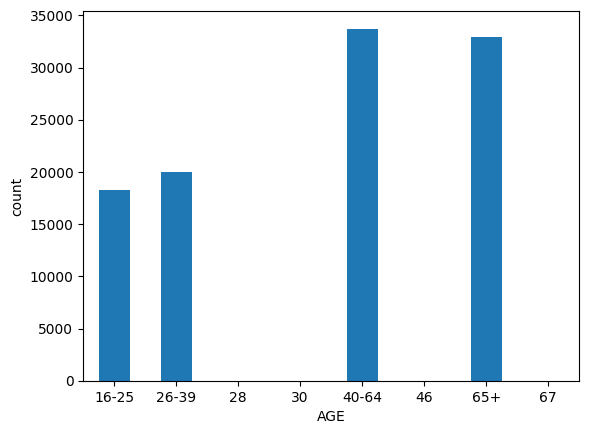


GENDER



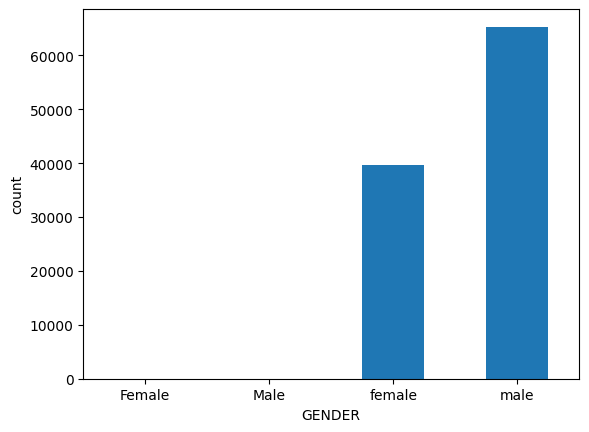


DRIVING_EXPERIENCE



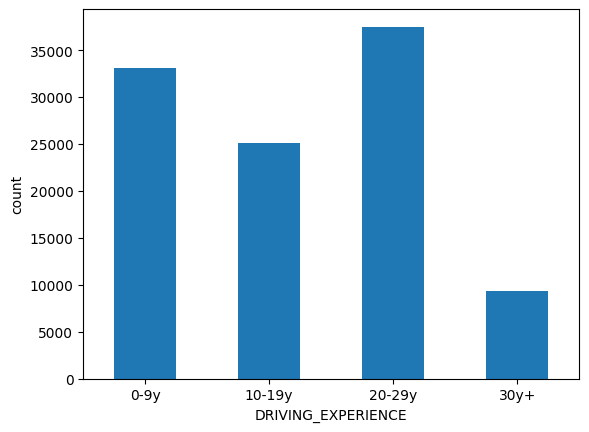


EDUCATION



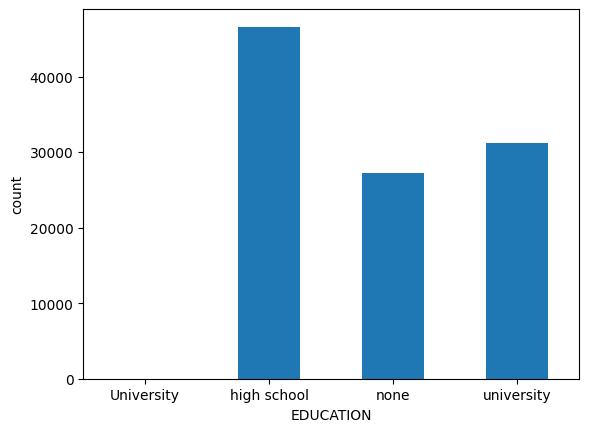


INCOME



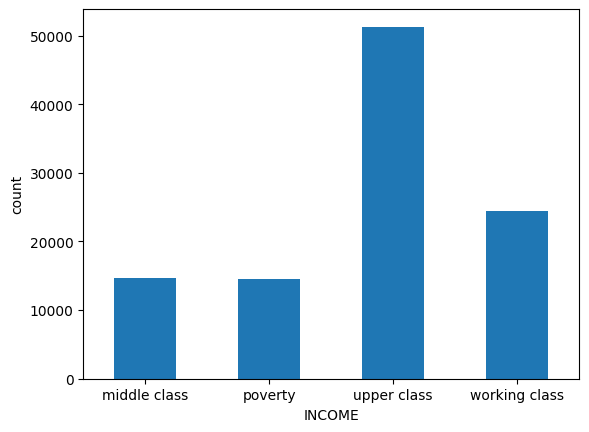


VEHICLE_YEAR



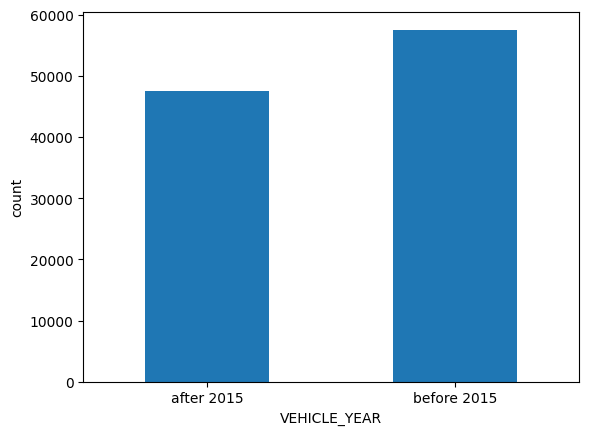


TYPE_OF_VEHICLE



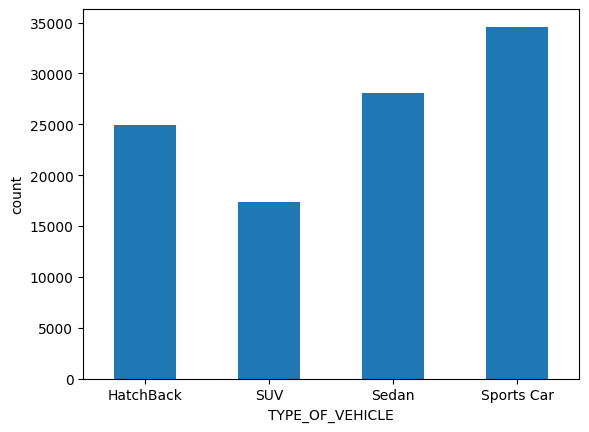

<Figure size 640x480 with 0 Axes>

In [20]:

for col in categorical_features:
    print()
    print(f"\033[1m{col}\033[0m\n")
    categorical_data[col].value_counts().sort_index().plot(kind='bar', rot=0, xlabel=col,ylabel='count')
    plt.show()
    #lưu ảnh png
    plt.savefig(f"{col}.png")




## 2.3. Mối quan hệ tương quan giữa các features với biến mục tiêu OUTCOME

**Mối quan hệ giữa numerical features và OUTCOME**

In [21]:
from pandas import set_option
set_option('display.float_format', '{:,.3f}'.format)
correlation = numerical_data.corr(method='pearson')
correlation


,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,1.000,0.006,-0.012,-0.018,-0.006,0.006,-0.010,-0.008,0.002,0.008,-0.001
CREDIT_SCORE,0.006,1.000,0.005,-0.000,-0.000,-0.006,-0.020,-0.009,0.005,-0.006,-0.261
VEHICLE_OWNERSHIP,-0.012,0.005,1.000,-0.005,0.006,-0.001,0.005,-0.005,0.003,0.001,-0.007
MARRIED,-0.018,-0.000,-0.005,1.000,-0.002,0.004,0.001,0.005,0.002,0.005,-0.051
CHILDREN,-0.006,-0.000,0.006,-0.002,1.000,-0.005,0.006,0.001,0.002,-0.006,-0.061
POSTAL_CODE,0.006,-0.006,-0.001,0.004,-0.005,1.000,0.007,0.008,0.008,0.010,0.012
ANNUAL_MILEAGE,-0.010,-0.020,0.005,0.001,0.006,0.007,1.000,-0.004,0.004,-0.004,0.009
SPEEDING_VIOLATIONS,-0.008,-0.009,-0.005,0.005,0.001,0.008,-0.004,1.000,0.006,0.005,0.353
DUIS,0.002,0.005,0.003,0.002,0.002,0.008,0.004,0.006,1.000,0.004,0.198
PAST_ACCIDENTS,0.008,-0.006,0.001,0.005,-0.006,0.010,-0.004,0.005,0.004,1.000,0.353


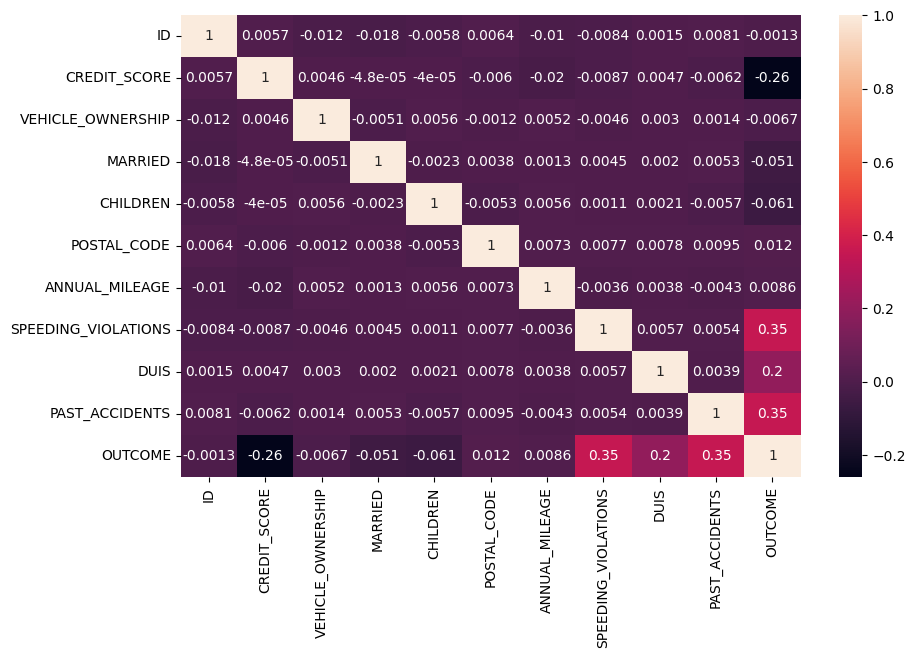

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(numerical_data.corr(), ax=ax, annot=True)
plt.show()

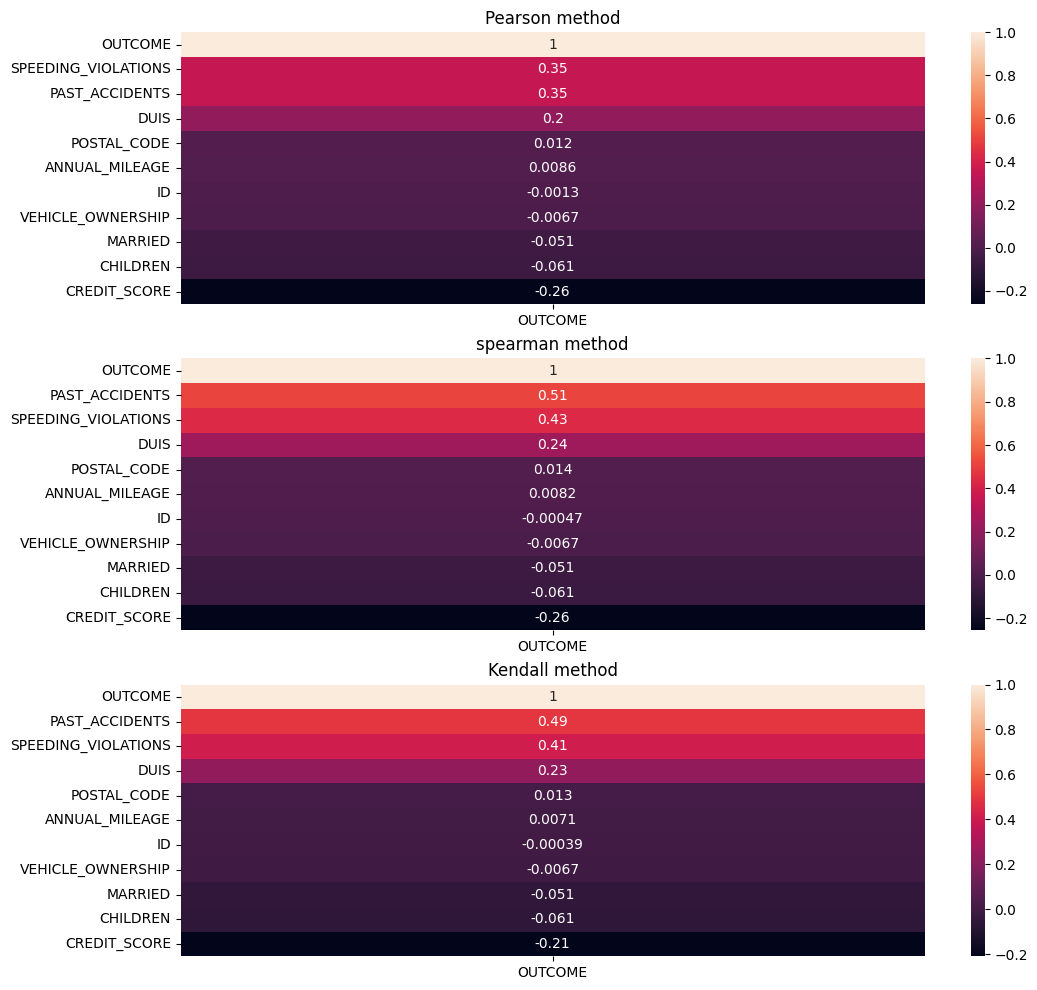

In [23]:

fig, ax = plt.subplots(3,1, figsize=(12, 12))
corr1 = numerical_data.corr('pearson')[['OUTCOME']].sort_values(by='OUTCOME', ascending=False)
corr2 = numerical_data.corr('spearman')[['OUTCOME']].sort_values(by='OUTCOME', ascending=False)
corr3 = numerical_data.corr('kendall')[['OUTCOME']].sort_values(by='OUTCOME', ascending=False)
ax[0].set_title('Pearson method')
ax[1].set_title('spearman method')
ax[2].set_title('Kendall method')
sns.heatmap(corr1, ax=ax[0], annot=True)
sns.heatmap(corr2, ax=ax[1], annot=True)
sns.heatmap(corr3, ax=ax[2], annot=True)

plt.show()

**Các đặc trưng có mối tương quan DƯƠNG mạnh nhất với Rủi ro:**

•	Ba đặc trưng liên quan đến lịch sử lái xe là PAST_ACCIDENTS, SPEEDING_VIOLATIONS, và DUIS luôn thể hiện hệ số tương quan dương cao nhất với OUTCOME trên cả ba phương pháp.

•	Ý nghĩa: Điều này chỉ ra mối quan hệ đồng biến rõ rệt: khi số lượng tai nạn hoặc vi phạm trong quá khứ của một cá nhân tăng lên, khả năng họ được phân loại vào nhóm rủi ro cao (OUTCOME=1) cũng tăng theo.

 **Đặc trưng có mối tương quan ÂM mạnh nhất với Rủi ro:**

•	Đặc trưng CREDIT_SCORE (Điểm tín dụng) thể hiện hệ số tương quan âm đáng kể nhất và nhất quán trên mọi phương pháp đo lường.

•	Ý nghĩa: Kết quả này cho thấy mối quan hệ nghịch biến: điểm tín dụng càng cao, xác suất rủi ro của cá nhân càng thấp. Đây là một chỉ báo tài chính quan trọng.

 **Các đặc trưng có mối tương quan yếu:**

•	Các biến số còn lại như ID, ANNUAL_MILEAGE, POSTAL_CODE, VEHICLE_OWNERSHIP, MARRIED, và CHILDREN có hệ số tương quan rất thấp (gần bằng 0) với OUTCOME. Điều này cho thấy chúng có ít mối liên hệ tuyến tính hoặc đơn điệu trực tiếp với việc xác định rủi ro khi xét đơn lẻ.

  **Kết luận và Định hướng Xử lý**

Kết quả phân tích tương quan xác nhận rằng nhóm biến lịch sử vi phạm là những chỉ báo rủi ro mạnh mẽ nhất. Tuy nhiên, khi kết hợp với kết quả phân tích độ lệch (skewness) trước đó, chúng ta nhận thấy đây là các dữ liệu sự kiện hiếm. Việc tương quan mạnh trên dữ liệu sự kiện hiếm cảnh báo nguy cơ cao về quá khớp (overfitting) nếu đưa trực tiếp vào mô hình học máy chính.

Do đó, kết quả này củng cố chiến lược tách biệt dữ liệu đã đề ra:

•	Nhóm biến lịch sử (tương quan dương mạnh nhưng là sự kiện hiếm): Sẽ được tách ra để xây dựng hệ thống quy tắc sàng lọc rủi ro độc lập (sau này).

•	Nhóm biến như CREDIT_SCORE (tương quan âm mạnh, phân phối tốt): Là ứng viên hàng đầu để làm đặc trưng chính cho mô hình dự đoán.

•	Nhóm biến tương quan yếu: Cần cân nhắc kỹ lưỡng trong giai đoạn lựa chọn đặc trưng (Feature Selection) tiếp theo.



**Mối quan hệ giữa Categorical features và OUTCOME**

In [24]:
import pandas as pd
from scipy.stats import chi2_contingency

# Đảm bảo bạn đã có danh sách này từ các bước trước
# categorical_features = ['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR', 'TYPE_OF_VEHICLE']
target_col = 'OUTCOME'

chi2_results = []

print("KẾT QUẢ KIỂM ĐỊNH CHI BÌNH PHƯƠNG (CHI-SQUARE TEST)\n")
print(f"Biến mục tiêu: {target_col}\nMức ý nghĩa (alpha): 0.05\n")
print("-" * 80)

for feature in categorical_features:
    # 1. Tạo bảng chéo (Contingency Table)
    # Bảng này đếm tần suất xuất hiện của các cặp giá trị (Ví dụ: Bao nhiêu người 'male' có outcome 0, bao nhiêu 'male' có outcome 1)
    contingency_table = pd.crosstab(df[feature], df[target_col])

    # 2. Thực hiện kiểm định Chi-square
    # Hàm trả về: thống kê chi2, p-value, bậc tự do, và bảng tần số kỳ vọng
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    # 3. Đánh giá kết quả dựa trên p-value
    # Nếu p-value < 0.05, ta bác bỏ giả thuyết H0 (H0: Hai biến độc lập) -> Kết luận là có mối liên hệ.
    if p_value < 0.05:
        conclusion = "Có mối liên hệ (Dependent)"
    else:
        conclusion = "Không có mối liên hệ đáng kể (Independent)"

    chi2_results.append({
        'Feature': feature,
        'Chi2 Statistic': round(chi2_stat, 2),
        'P-value': round(p_value, 5), # Làm tròn p-value để dễ đọc
        'Kết luận': conclusion
    })

# 4. Tạo DataFrame tổng hợp và hiển thị
chi2_df = pd.DataFrame(chi2_results)

# Sắp xếp theo P-value tăng dần (P-value càng nhỏ, mối quan hệ càng có ý nghĩa thống kê)
chi2_df = chi2_df.sort_values(by='P-value', ascending=True).reset_index(drop=True)

# Hiển thị bảng kết quả
from IPython.display import display
display(chi2_df)

print("\nNhận xét:")
print("- Các biến có P-value < 0.05 (thường hiển thị là 0.0 nếu rất nhỏ) là những biến có ảnh hưởng có ý nghĩa thống kê đến OUTCOME.")
print("- P-value càng nhỏ, khả năng hai biến này độc lập với nhau càng thấp (tức là mối quan hệ càng rõ ràng).")

KẾT QUẢ KIỂM ĐỊNH CHI BÌNH PHƯƠNG (CHI-SQUARE TEST)

Biến mục tiêu: OUTCOME
Mức ý nghĩa (alpha): 0.05

--------------------------------------------------------------------------------


,Feature,Chi2 Statistic,P-value,Kết luận
0,AGE,"5,016.620",0.000,Có mối liên hệ (Dependent)
1,VEHICLE_YEAR,4.280,0.038,Có mối liên hệ (Dependent)
2,EDUCATION,6.140,0.105,Không có mối liên hệ đáng kể (Independent)
3,GENDER,3.010,0.390,Không có mối liên hệ đáng kể (Independent)
4,INCOME,2.980,0.394,Không có mối liên hệ đáng kể (Independent)
5,DRIVING_EXPERIENCE,1.720,0.632,Không có mối liên hệ đáng kể (Independent)
6,TYPE_OF_VEHICLE,1.650,0.647,Không có mối liên hệ đáng kể (Independent)



Nhận xét:
- Các biến có P-value < 0.05 (thường hiển thị là 0.0 nếu rất nhỏ) là những biến có ảnh hưởng có ý nghĩa thống kê đến OUTCOME.
- P-value càng nhỏ, khả năng hai biến này độc lập với nhau càng thấp (tức là mối quan hệ càng rõ ràng).


•	**Các biến có mối liên hệ đáng kể với OUTCOME (P-value < 0.05):**

o	AGE (Tuổi): Với Chi2 Statistic rất cao (5,016.62) và P-value = 0.000, đây là biến phân loại có ảnh hưởng mạnh mẽ nhất đến biến mục tiêu. Điều này hoàn toàn hợp lý vì độ tuổi thường liên quan mật thiết đến kinh nghiệm và hành vi lái xe.
o	VEHICLE_YEAR (Năm sản xuất xe): P-value = 0.038 (nhỏ hơn 0.05), cho thấy có mối liên hệ có ý nghĩa thống kê giữa đời xe và rủi ro.

•	**Các biến KHÔNG có mối liên hệ đáng kể với OUTCOME (P-value > 0.05):**

o	EDUCATION (P=0.105), GENDER (P=0.390), INCOME (P=0.394), DRIVING_EXPERIENCE (P=0.632), TYPE_OF_VEHICLE (P=0.647): Kết quả kiểm định cho thấy không đủ bằng chứng thống kê để bác bỏ giả thuyết rằng các biến này độc lập với OUTCOME. Điều này có nghĩa là việc biết thông tin về giới tính, thu nhập, hay loại xe, v.v., không giúp ích đáng kể trong việc dự đoán rủi ro một cách trực tiếp khi xét đơn lẻ.

**Định hướng Xử lý Tiếp theo (Quan trọng)**

Dựa trên kết quả này, nhóm có hai hướng xử lý chính cho bước Feature Selection (Lựa chọn đặc trưng) trong pipeline:

•	**Nhận định**: Mặc dù kiểm định Chi-square đơn biến cho kết quả không đáng kể, nhưng các yếu tố như DRIVING_EXPERIENCE (kinh nghiệm lái xe) hay INCOME (liên quan đến khả năng bảo dưỡng xe) về mặt logic nghiệp vụ vẫn được xem là quan trọng đối với rủi ro bảo hiểm.

•	**Hành động**:

o	Chỉ loại bỏ ID, POSTAL_CODE để giảm độ phức tạp của mô hình.

o	Để cho các thuật toán máy học mạnh mẽ (như Random Forest, XGBoost) trong giai đoạn modeling.py tự quyết định tầm quan trọng của chúng. Các thuật toán này có khả năng nắm bắt các mối quan hệ phi tuyến và tương tác phức tạp giữa các biến mà kiểm định Chi-square đơn biến không phát hiện được.

Tóm lại: Nhóm  ghi nhận rằng AGE và VEHICLE_YEAR có mối liên hệ thống kê mạnh nhất. Tuy nhiên, để tận dụng tối đa khả năng của các mô hình học máy hiện đại trong việc phát hiện các tương tác phức tạp, nhóm quyết định giữ lại tất cả các đặc trưng phân loại để đưa vào giai đoạn huấn luyện mô hình tiếp theo.


## 2.4. Kiểm tra dữ liệu cân bằng cho biến target


In [25]:

class_counts=df.groupby("OUTCOME").size()
columns=['outcome','count','percentage']
outcome=[0,1]
count=list()
percentage=list()
for val in range(2):
    count.append(class_counts[val])
    percent=(class_counts[val]/105000)*100
    percentage.append(percent)
imbalance_df=pd.DataFrame(list(zip(outcome,count,percentage)),columns=columns)
imbalance_df

,outcome,count,percentage
0,0,47105,44.862
1,1,57912,55.154


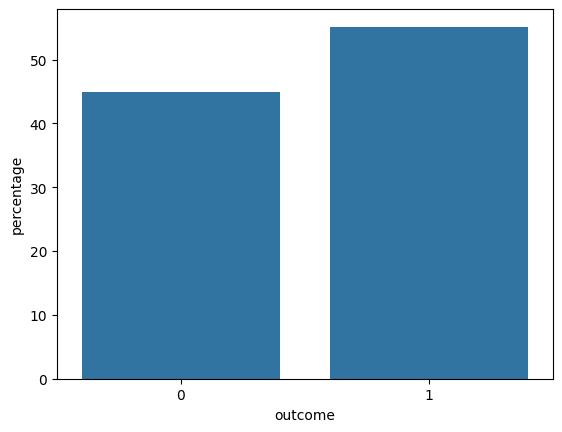

In [26]:
sns.barplot(data=imbalance_df,x=imbalance_df['outcome'],y=imbalance_df['percentage'])
plt.show()

**Nhận xét**

Dữ liệu cho thấy sự phân bố lý tưởng của biến mục tiêu với 45% nhãn An toàn (OUTCOME = 0) và 55% (OUTCOME = 1) nhãn Rủi ro. Về mặt kỹ thuật, đặc điểm này cho phép nhóm áp dụng trực tiếp các thước đo tiêu chuẩn như Accuracy mà không cần can thiệp bằng các kỹ thuật xử lý mất cân bằng phức tạp. Xét trên khía cạnh bài toán, sự phân phối này—tuy cao hơn tỷ lệ tai nạn thực tế—là một bước chuẩn bị dữ liệu thiết yếu. Nó đảm bảo mô hình được huấn luyện trong môi trường tối ưu nhất để học sâu các tín hiệu rủi ro, thay vì bị lấn át bởi số lượng lớn các trường hợp an toàn.



## **KẾT LUẬN**

**a.	Đảm bảo chất lượng dữ liệu**

•	Xử lý Lỗi Ngữ nghĩa (Semantic Error Correction): Đối với các giá trị âm bất hợp lý trong cột ANNUAL_MILEAGE và PAST_ACCIDENTS , sử dụng phương pháp Lấy giá trị tuyệt đối (Absolute Value Transformation). Giả định rằng đây là lỗi nhập liệu về dấu (sign error) thay vì dữ liệu rác.

•	Xử lý Lỗi Chính tả (Fuzzy Matching): Để khắc phục sự không nhất quán trong các biến phân loại (ví dụ: 'University' vs 'university'), áp dụng thuật toán Fuzzy String Matching (sử dụng thư viện fuzzywuzzy) với ngưỡng tương đồng (fuzzy_threshold) là 90. Các giá trị không đạt ngưỡng này sẽ được chuyển về NaN để xử lý như dữ liệu thiếu.

•	Chiến lược Điền khuyết (Imputation Strategy): Áp dụng chiến lược điền khuyết phân tầng: sử dụng Median cho biến số (để tránh ảnh hưởng bởi ngoại lai) và Mode cho biến phân loại.

Ngoài ra đảm bảo dữ liệu không bị trùng lặp, hợp lệ và đáp ứng đủ 7 tiêu chí chất lượng dữ liệu.

**b.	Gợi ý biến đổi và chuẩn hóa dữ liệu**

•	Xử lý Ngoại lai (Outlier Handling): Với các biến có phân phối lệch và nhiều ngoại lai như ANNUAL_MILEAGE , áp dụng kỹ thuật Capping (Winsorization) dựa trên phân vị (ví dụ: cắt tại ngưỡng 1% và 99%) thay vì xóa bỏ, nhằm giữ lại thông tin của các nhóm khách hàng đặc biệt.

•	Chuẩn hóa Dữ liệu (Scaling): Do dữ liệu chứa ngoại lai, ưu tiên sử dụng RobustScaler (dựa trên Trung vị và IQR) cho các biến có độ lệch trung bình , và PowerTransformer (Yeo-Johnson) cho các biến có độ lệch cao để đưa phân phối về dạng gần chuẩn (Gaussian-like), hỗ trợ tốt hơn cho các thuật toán như Logistic Regression và SVM.

•	Mã hóa Biến phân loại (Encoding):

	Sử dụng Ordinal Encoding cho các biến có thứ tự như EDUCATION và INCOME.

	Sử dụng One-Hot Encoding cho các biến định danh như GENDER và TYPE_OF_VEHICLE, giúp mô hình học được đặc trưng mà không tạo ra thứ tự giả

**c.	Lựu chọn / tạo đặc trưng mới**

•	Tạo đặc trưng tương tác (Interaction Features): Xây dựng các biến tổng hợp như Family Stability bằng cách kết hợp MARRIED, CHILDREN và VEHICLE_OWNERSHIP. Kỹ thuật này giúp mô hình bắt được các mẫu hành vi phức tạp hơn là xét từng biến đơn lẻ.

•	Loại bỏ biến Rò rỉ (Leakage Prevention): Kiên quyết loại bỏ nhóm biến hành vi (DUIS, SPEEDING) khỏi tập đặc trưng huấn luyện, chuyển chúng sang hệ thống lọc Rule-based độc lập.

•	Lựa chọn đặc trưng (Feature Selection): Sử dụng kỹ thuật RFE (Recursive Feature Elimination) hoặc Sequential Forward Selection để tự động chọn lọc ra tập hợp các biến tối ưu nhất, giúp giảm chiều dữ liệu và ngăn ngừa Overfitting.

